# AB TEST

### About Dataset (예시의 데이터셋에 관해서)

The AB Testing Dataset provided here is a self-generated synthetic dataset created using Random Sampling techniques provided by the Numpy Package. The dataset emulates information regarding visits made by users on an imaginary retail website around the United Kingdom. The users are found to be in two groups, A and B, each of which represents a control group and treatment group respectively. Imagine that the retail company needs to test out a new change on the website which is, "Do people spend time on a website if the website background color is White or Black". This question is asked to achieve the end goal of the analysis which is to improve user engagement, whether it is through a purchase, signing up, etc.

So, in this scenario, let the color 'White' be assigned to Group A which is the default setting for the background color on the website, representing the control group. Also, let the color 'Black' be equivalent to Group B which is the newer setting to be tested. And the main goal is to understand whether there is a significant improvement in website views if the newer setting is applied. This can be answered through the use of A/B Testing.

This dataset is placed to help with practicing A/B Testing as it is a very important topic for Data Analyst prospects. The column description is given as follows:

넘파이 패키지의 랜덤 샘플링을 통해 생성되었다. 영국의 가상 웹사이트 이용 방문객들에 대한 내용이며, A, B의 실험군과 대조군에 대한 내용이다. 웹사이트의 배경이 흰색이나 검은색일 때가 이용시간에 영향을 미치는지를 확인해 볼 것이다. 나아가 이것이 상품의 구매등에 영향을 끼지는지 확인해 보자.

그룹 A는 흰색 배경, B는 검은 배경으로 이 변화가 유의미한지 A/B 테스트를 해보자.

컬럼은 다음과 같다.

User ID - 회원들의 아이디

Group - 어느 집단인지. A와 B그룹 -> 각각을 나누어 데이터프레임을 생성해줘야 할 것 같다.

Page Views - 본 페이지 수

Time Spent - 총 소비한 시간

Conversion - 원하는 작업을 완료했는지 여부

Device - 사용한 장치(모바일/데스크탑)

Location - 장소

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ab_testing.csv')
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [3]:
df.describe()

,User ID,Page Views,Time Spent
count,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600
std,2869.153773,4.022465,118.254153
min,10001.000000,1.000000,40.000000
25%,12456.250000,4.000000,137.000000
50%,14858.500000,8.000000,243.000000
75%,17379.750000,11.000000,346.000000
max,19995.000000,14.000000,449.000000


대상이 되는 회원들의 수는 약 5000명이다. 평균적으로 확인한 페이지 수는 7페이지 정도이며, 소비한 시간은 240분 정도 이다.

In [4]:
df_A = df[df['Group']=='A']
df_B = df[df['Group']=='B']

## 1. EDA 
각 컬럼들에 대해서 탐색해 보자.

#### 1-1 Group
그룹은 A와 B가 존재한다.

In [5]:
df['Group'].value_counts()

Group
A    2519
B    2481
Name: count, dtype: int64

정확히 같은 수는 아니지만 유사하게 2500개 정도의 값을 가지고 있다.

수치적으로 분석해야 하므로 Conversion의 Yes를 1, No를 0으로 매핑해준다.

In [6]:
df['Conversion'] = df['Conversion'].map({'Yes':1,'No':0})

In [7]:
df[['Conversion','Group']].groupby('Group').mean()

,Conversion
Group,
A,0.053990
B,0.140669


그룹별로 전환율의 차이가 존재하는 것을 확인 할 수 있다.
이 전환율이 유의미한지, 어떠한 변수들로 인한 것인지를 확인해야 한다.

#### 1-2 Page Views

In [8]:
df['Page Views'].value_counts()

Page Views
7     382
10    373
8     365
11    364
4     363
1     361
2     360
12    358
13    358
9     354
14    354
6     353
3     329
5     326
Name: count, dtype: int64

페이지 수는 고르게 분포하고있다. 1-14페이지 까지 한 페이지 별로 약 300명씩의 이용자가 존재한다.

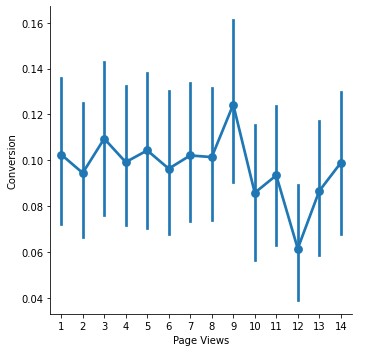

In [9]:
sns.catplot(data = df, x='Page Views', y='Conversion', kind='point')

In [10]:
df[['Conversion','Page Views']].groupby('Page Views').mean()

,Conversion
Page Views,
1,0.102493
2,0.094444
3,0.109422
4,0.099174
5,0.104294
6,0.096317
7,0.102094
8,0.101370
9,0.124294


페이지수 별로의 전환률은 고르게 0.1 정도의 값을 갖고 있으며, 오히려 확인한 페이지가 많을 때가 적을때에 비해서 전환률이 낮은 경향도 보이는 것을 확인할 수 있다.

#### 1-3 Time Spent

<Axes: xlabel='Time Spent', ylabel='count'>

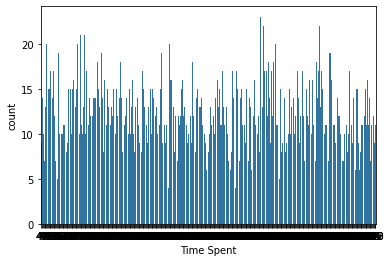

In [11]:
sns.countplot(data = df, x='Time Spent')

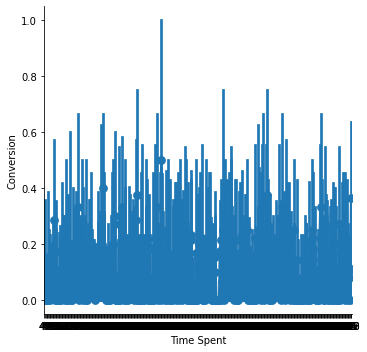

In [12]:
sns.catplot(data = df, x='Time Spent', y='Conversion', kind='point')

소비한 시간별로의 전환율을 확인했을 때, 시간과 전환율 사이의 상관관계는 크게 없는 것으로 확인된다.

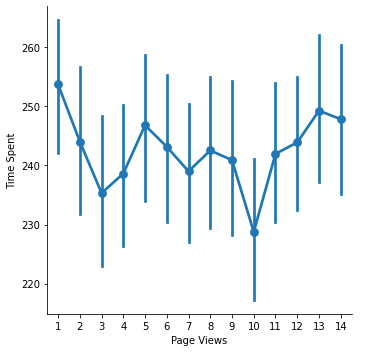

In [13]:
sns.catplot(data = df, x='Page Views', y='Time Spent', kind='point')

페이지 수가 많을수록 소모한 시간이 것이라고 생각했었는데 크게 상관이 없는것으로 나타났다. 딱히 공선성을 확인할 수 없는것으로 보인다.

#### 1-4 Device

In [14]:
df['Device'].value_counts()

Device
Desktop    2538
Mobile     2462
Name: count, dtype: int64

장비는 desktop과 mobile 두 종류가 존재한다.

In [15]:
df[['Device','Conversion']].groupby('Device').mean()

,Conversion
Device,
Desktop,0.099685
Mobile,0.094232


모바일과 데스크탑에서의 전환률의 차이는 크게 없어 보인다.

수치적으로 분석하기 위해 매핑을 해준다.

In [16]:
df['Device'] = df['Device'].map({'Desktop':0, 'Mobile':1})

#### 1-5 Location

In [17]:
df['Location'].value_counts()

Location
Scotland            1281
England             1246
Northern Ireland    1242
Wales               1231
Name: count, dtype: int64

이용 장소는 크게 네곳으로 영국의 네 지역으로 보인다. 스코틀랜드, 잉글랜드, 북아일랜드, 웨일즈 의 네 곳이다.

In [18]:
df[['Location','Conversion']].groupby('Location').mean()

,Conversion
Location,
England,0.109149
Northern Ireland,0.082931
Scotland,0.097580
Wales,0.098294


네 지역 모드 0.1정도의 전환률을 띄며 지역별로의 차이는 크게 없어 보인다.

마찬가지로 매핑을 해주자

In [19]:
df['Location'] = df['Location'].map({'England':0,'Northern Ireland':1,'Scotland':2,'Wales':3})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   int64 
 5   Device      5000 non-null   int64 
 6   Location    5000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


In [21]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,0,1,1
1,11682,A,9,342,0,1,2
2,19825,A,2,396,0,0,1
3,16080,B,4,318,0,0,3
4,18851,A,1,338,1,0,2


In [22]:
df = df.drop(columns = 'User ID')

In [23]:
df_A = df[df['Group'] == 'A']

In [24]:
df_B = df[df['Group'] == 'B']

In [25]:
df[['Page Views','Time Spent','Conversion','Device','Location']].corr()

,Page Views,Time Spent,Conversion,Device,Location
Page Views,1.000000,-0.001484,-0.018269,0.001833,-0.009347
Time Spent,-0.001484,1.000000,0.002100,-0.005779,-0.005638
Conversion,-0.018269,0.002100,1.000000,-0.009210,-0.006800
Device,0.001833,-0.005779,-0.009210,1.000000,-0.002702
Location,-0.009347,-0.005638,-0.006800,-0.002702,1.000000


변수들간의 상관관계는 크게 없는 것으로 나타났다.

In [26]:
df.groupby('Group').describe()

Page Views                                                Time Spent  \
           count      mean       std  min  25%  50%   75%   max      count   
Group                                                                        
A         2519.0  7.581580  4.080066  1.0  4.0  8.0  11.0  14.0     2519.0   
B         2481.0  7.492946  3.963448  1.0  4.0  8.0  11.0  14.0     2481.0   

                   ... Device      Location                                \
             mean  ...    75%  max    count      mean       std  min  25%   
Group              ...                                                      
A      241.733227  ...    1.0  1.0   2519.0  1.524811  1.109243  0.0  1.0   
B      243.303910  ...    1.0  1.0   2481.0  1.473599  1.118488  0.0  0.0   

                      
       50%  75%  max  
Group                 
A      2.0  2.0  3.0  
B      1.0  2.0  3.0  

[2 rows x 40 columns]

In [27]:
df[['Page Views','Group']].groupby('Group').describe()

Page Views                                               
           count      mean       std  min  25%  50%   75%   max
Group                                                          
A         2519.0  7.581580  4.080066  1.0  4.0  8.0  11.0  14.0
B         2481.0  7.492946  3.963448  1.0  4.0  8.0  11.0  14.0

In [28]:
df[['Time Spent','Group']].groupby('Group').describe()

Time Spent                                                          
           count        mean         std   min    25%    50%    75%    max
Group                                                                     
A         2519.0  241.733227  117.340026  40.0  137.5  241.0  343.0  449.0
B         2481.0  243.303910  119.193552  40.0  136.0  244.0  348.0  449.0

In [29]:
df[['Conversion','Group']].groupby('Group').describe()

Conversion                                             
           count      mean       std  min  25%  50%  75%  max
Group                                                        
A         2519.0  0.053990  0.226042  0.0  0.0  0.0  0.0  1.0
B         2481.0  0.140669  0.347750  0.0  0.0  0.0  0.0  1.0

In [30]:
df.groupby('Group')['Conversion'].value_counts(normalize=True)

Group  Conversion
A      0             0.946010
       1             0.053990
B      0             0.859331
       1             0.140669
Name: proportion, dtype: float64

In [31]:
df[['Device','Group']].groupby('Group').describe()

Device                                             
        count      mean       std  min  25%  50%  75%  max
Group                                                     
A      2519.0  0.506153  0.500061  0.0  0.0  1.0  1.0  1.0
B      2481.0  0.478436  0.499635  0.0  0.0  0.0  1.0  1.0

In [32]:
df[['Location','Group']].groupby('Group').describe()

Location                                             
         count      mean       std  min  25%  50%  75%  max
Group                                                      
A       2519.0  1.524811  1.109243  0.0  1.0  2.0  2.0  3.0
B       2481.0  1.473599  1.118488  0.0  0.0  1.0  2.0  3.0

#### 장치와 장소에 대한 분석

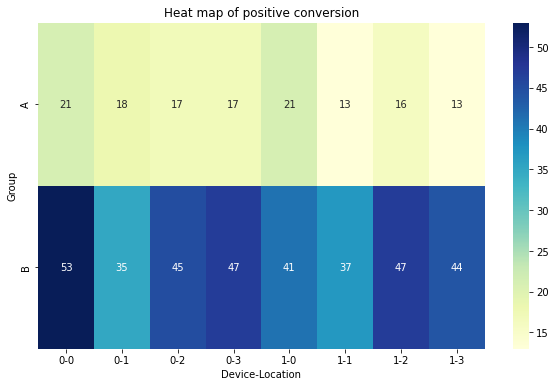

In [33]:
positive_conversion = df[df['Conversion']==1].reset_index(drop=True)
grouped_counts = positive_conversion.groupby(['Group','Device','Location'])['Conversion'].count().reset_index(name='Count')

pivot_table = grouped_counts.pivot_table(index='Group', columns=['Device','Location'], values='Count')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu')
plt.title("Heat map of positive conversion")
plt.show()

'England':0,'Northern Ireland':1,'Scotland':2,'Wales':3

'Desktop':0, 'Mobile':1

비율이 아니라 단순이 전환한 사람수를 카운트 한 것이다.

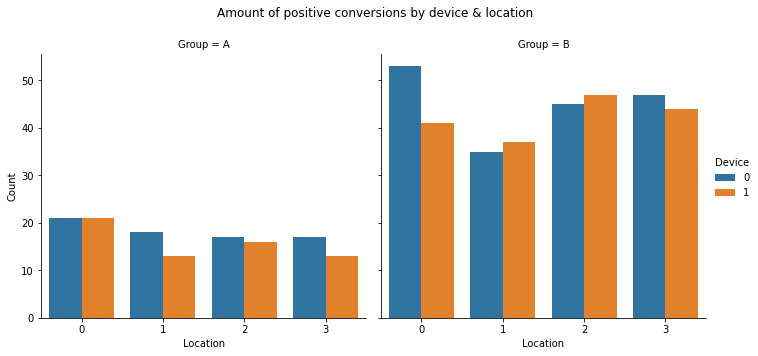

In [34]:
graph = sns.catplot(data=grouped_counts, x='Location',y='Count',hue='Device',kind='bar',col='Group')
graph.fig.suptitle('Amount of positive conversions by device & location')
graph.fig.subplots_adjust(top=0.85)
plt.show()

어떤 장소-장치 조합이던간에 그룹 B에서가 더 많은 전환이 일어난 것을 확인할 수 있다.

## 사용하는 검정법 - 독립표본 t검정

두개의 독립된 모집단의 평균을 비교하기 위해 사용한다. -> 본 예시에서는 두 모집단 A,B 에서 배경색깔에 대해 전환률의 차이가 있는지 확인하는 것이기 때문에 적합하다.

## 1. 가정
1) 정규성 만족 - 표본의 크기가 충분히 큰지 확인 

보통 표본의 크기가 30 이상일때 정규성을 만족한다고 본다.

2) 두 모집단이 서로 독립적

3) 두 모집단의 분산이 같음을 만족하는 등 분산성 가정을 만족.(두 독립 집단의 모분산이 동일해야 함을 의미. 검정통계량 계산 전에 등분산 검정을 먼저 수행해야 함)

4) 독립변수는 범주형, 종속변수는 연속형이여야 한다.

## 2. 단계

### 1) 가설 설정 

모수 : 두 집단의 평균(전환률)

귀무가설 : 두 집단간의 평균에는 차이가 없다.

대립가설 : 두 집단간의 평균에는 차이가 있다.(유의미하다)

### 2) 유의수준 설정

유의수준은 보통 0.05의 값을 사용한다. 이는 역사적/실용적 이유로 신뢰성과 실용성을 균형있게 고려한 값이다.(5%의 오류를 허용한다)

높은 신뢰성이 요구되는 경우 더 낮은 유의수준을 가지기도 한다.

### 3) 등분산 검정

레빈 테스트를 통해 등분산을 검정한다

귀무가설 : 두 집단의 분산이 동일하다.

대립가설 : 두 집단의 분산이 동일하지 않다.

In [35]:
from scipy.stats import levene

stat,p = levene(df_A['Conversion'],df_B['Conversion'])

In [36]:
p

np.float64(2.278437788500658e-25)

p값이 유의수준보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

이에 따라 t검정은 등분산을 가정하지 않는다.

### 4) 검정 통계랑의 값 및 유의확률 계산

In [37]:
from scipy.stats import ttest_ind

In [38]:
t_stat,p_value = ttest_ind(df_A['Conversion'],df_B['Conversion'],equal_var=False)

In [39]:
t_stat

np.float64(-10.432983883982358)

In [40]:
p_value

np.float64(3.5230423787403033e-25)

### 5) 기각여부 판단 및 의사결정 

p_value가 유의수준인 0.05를 넘지 않으므로 귀무가설을 기각한다. 두 집단에서 전환률의 차이는 유의미하며, t값이 -10.4이기 때문에 그룹 B일때의 전환률이 더 크다는 것을 의미한다.

따라서 두 그룹  A,B에서 배경화면의 차이에 따른 전환률이 다르다 라는 가정은 유의미한 것으로 판단되며, 흰 배경일 때 보다 검정 배경일 때가 더 높다.

## 모델 설렉션

In [41]:
!pip install scikit-learn

In [42]:
%matplotlib inline

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.model_selection import train_test_split

#### 2-1) 모델 선택 - 단일 모델

단일 모델들에 대해서 평가해보고 K-fold를 통해 평가

사용하는 모델은 선형 회귀, 로지스틱 회귀, 결정트리, 랜덤포레스트, GBM(그레디언트 부스팅 머신), SVM(서포트 벡터 머신), KNN(K-최근접 이웃), ANN(인공신경망), CNN(컨볼루션 신경망), RNN(순환신경망), 나이브 베이즈, XGBoost, K평균, DBSCAN 등이 있다.

In [46]:
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [68]:
models = {
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Random Forest" : RandomForestClassifier(),
    "SVM" : SVC(probability=True),
    "Decision Tree" : DecisionTreeClassifier(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

로지스틱 회귀에서 설정하는 값인 max_iter=1000 는 최적화를 수행할 최대 반복 횟수를 의미한다. 반복 횟수가 너무 많아지지 않도록 상한선을 제공하고, 최적화에 수렴하면 횟수를 만족하지 않아도 학습이 완료된다.

작은 데이터 셋에서는 1000회 정도가 적당하다.

In [48]:
df['Group'] = df['Group'].map({'A':0, 'B':1})

In [49]:
df.head()

,Group,Page Views,Time Spent,Conversion,Device,Location
0,1,3,424,0,1,1
1,0,9,342,0,1,2
2,0,2,396,0,0,1
3,1,4,318,0,0,3
4,0,1,338,1,0,2


In [50]:
X = df.drop(columns='Conversion')

In [51]:
X.head()

,Group,Page Views,Time Spent,Device,Location
0,1,3,424,1,1
1,0,9,342,1,2
2,0,2,396,0,1
3,1,4,318,0,3
4,0,1,338,0,2


In [52]:
y = df['Conversion']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [69]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "ROC-AUC": roc_auc
    })

y_pred_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

hasattr을 통해 predict-proba라는 매서드를 가지고 있는지 확인하여 있다면 사용하고, 없다면 y_pred_prob를 None으로 설정한다.
(SVR과 같은 최귀모델/ 일부 분류 알고리즘은 없음)
즉 확률 기반의 예측값을 얻을 수 없다면 확률을 계산하지 않겠다 라는 뜻이다.

model.predict_proba(X_test) 를 통해 모델이 각 클래스에 대해 예측한 확률을 반환한다.
결과로 2차원 배열을 얻게 되는데 (샘플수, 클래스수) 의 형태이다

예를 들어 100개의 샘플에 대해서 0과 1 두개의 클래스가 있다면 (100,2) 크기의 넘파이 배열을 반환한다.

[:1]을 통해서 두번째 열(클래스 1에 대한 확률)만을 추출하여 양성 클래스 -> 해당 코드에서는 'Conversion'이 1일 확률들에 대한 배열을 얻는다. 이를 이용하여 ROC_AUC 계산할 수 있다.

accuracy는 정확도를 계산한다.(전체 예측중에서 일치하는 비율)
report는 precision, recall, f1-score을 종합적으로 보여준다.
output_dict=True로 설정하면 딕셔너리의 형태로 반환한다.

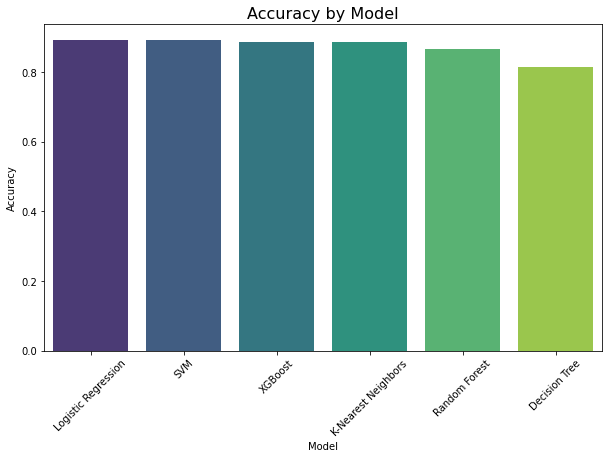

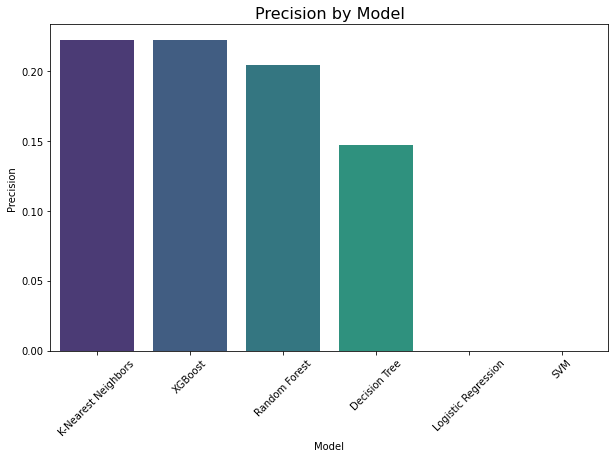

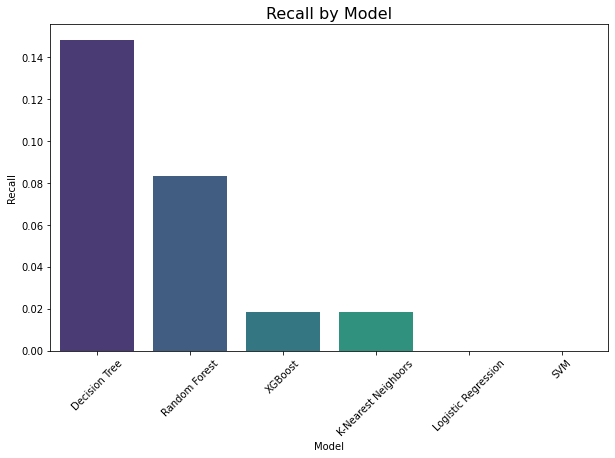

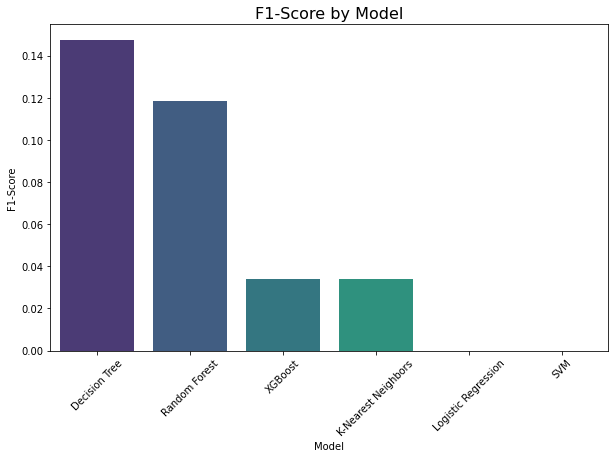

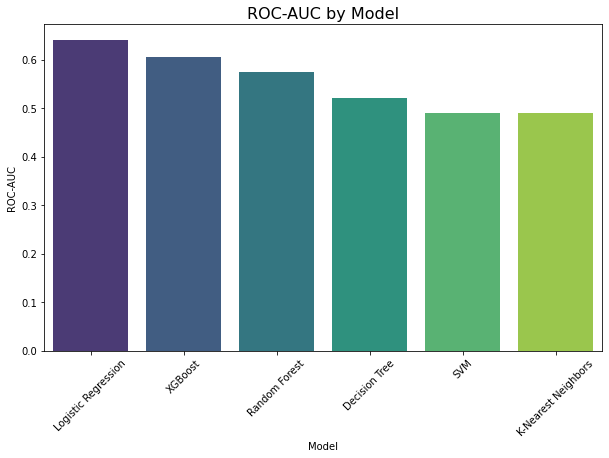

In [70]:
results_df = pd.DataFrame(results)

metrics = ['Accuracy','Precision','Recall','F1-Score','ROC-AUC']

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(x="Model", y=metric, data=results_df.sort_values(by=metric,ascending=False), palette='viridis')
    plt.title(f'{metric} by Model', fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.show()

In [71]:
results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.892,0.000000,0.000000,0.000000,0.640565
2,SVM,0.892,0.000000,0.000000,0.000000,0.490808
5,XGBoost,0.887,0.222222,0.018519,0.034188,0.605511
4,K-Nearest Neighbors,0.887,0.222222,0.018519,0.034188,0.489256
1,Random Forest,0.866,0.204545,0.083333,0.118421,0.574775
3,Decision Tree,0.815,0.146789,0.148148,0.147465,0.520512


accuracy(정확도) - 전체 예측중에서 맞게 예측된 비율(양성을 양성으로 + 음성을 음성으로)
데이터에 클래스 불균형이 있는 경우 평가하기 어려움

precision(정밀도) - 양성이라고 예측한 것들 중에서 실제로 양성인 비율(모델의 양성예측 비율이 얼나마 정확한가)
ex) 스팸이라고 판단된 메일중에서 실제 스팸이 아니면 문제가 됨

recall(재현율) - 실제 양성인 사례들 중에서 양성으로 예측한 비율(모델이 실제 양성을 놓치지 않고 잘 찾아냈는지)
ex) 질병 환자를 놓치면 치명적

F1-score - precision 과 recall의 조화평균(둘 모두 적절히 높은지 평가)

ROC-AUR - ROC곡선 아래의 면적(0.5-1.0)
1.0에 가까울수록 음성과 양성을 잘 구별, 0.5이면 랜덤예측 수준